# Load random image and groundtruth

In [1]:
%matplotlib notebook
import numpy as np
from PIL import Image
import os
import random
import caffe
import diagnose_weights as dwi


# init
caffe.set_device(0)
caffe.set_mode_gpu()

# load image (RGB), switch to BGR, subtract mean, and make dims C x H x W for Caffe
gt_name = random.choice(os.listdir('/data02/bioinf/treml/pascal/VOC2011/SegmentationClass'))
im_name = gt_name[:-4] + '.jpg'
#im_name = '2007_000999.jpg'
#gt_name = '2007_000999.png'
print('Image: ' + im_name)
print('Gt: ' + gt_name)
im = Image.open(os.path.join('/data02/bioinf/treml/pascal/VOC2011/JPEGImages', im_name))
print('Image has mode', im.mode)
in_ = np.array(im, dtype=np.float32)
in_ = in_[:,:,::-1]
in_ -= np.array((104.00698793,116.66876762,122.67891434))
in_ = in_.transpose((2,0,1))

# load groundtruth (8-bit pixels from [0,255] (mode P))
gt = Image.open(os.path.join('/data02/bioinf/treml/pascal/VOC2011/SegmentationClass', gt_name))
#print('Label has mode', gt.mode)
gt = np.array(gt, dtype=np.uint8)
#print('Label has shape', gt.shape)
#print('Image has shape', in_.shape)

# Man from paper
# Man from paper
# Image: 2007_000999.jpg
# Gt: 2007_000999.png

# Pascal dataset has variable sizes, e.g.:
#
# Label has shape (500, 380)
# Image has shape (3, 500, 380)
# OR
# Label has shape (375, 500)
# Image has shape (3, 375, 500)

Image: 2007_002953.jpg
Gt: 2007_002953.png
Image has mode RGB


# Load PRE-TRAINED net to infer from

In [2]:
# use original arch (correctly named fcX-layers)
#net = caffe.Net('voc-fcn8s-atonce/deploy_original.prototxt', 
#                          'voc-fcn8s-atonce/fcn8s-atonce-pascal.caffemodel',
#                          caffe.TEST)

# Load SELF-TRAINED net to infer from

In [7]:
# use modified arch (renamed fcX-layers)
net = caffe.Net('voc-fcn8s-atonce/deploy.prototxt', 
                          'voc-fcn8s-atonce/logs/N=full_lr=1e-10/snapshot/train_iter_93478.caffemodel',
                          caffe.TEST)

# Load INITIAL WEIGHTS to infer from

In [4]:
# use modified arch (renamed fcX-layers)train_iter_84980.caffemodel
#net = caffe.Net('voc-fcn8s-atonce/deploy.prototxt', 
#                          'voc-fcn8s-atonce/vgg16fc.caffemodel',
#                          caffe.TEST)
# MEAN:  0.0

In [8]:
# shape for input (data blob is N x C x H x W), set data
net.blobs['data'].reshape(1, *in_.shape)
net.blobs['data'].data[...] = in_
# run net and take argmax for prediction
net.forward()
out = net.blobs['score'].data[0].argmax(axis=0)
print('MEAN: ', np.mean(out[:]))
np.unique(out)

MEAN:  3.66005405405


array([ 0,  5,  6, 20])

# Do the plotting

4 classes: [0, 5, 6, 20] or ['background', 'bottle', 'bus', 'tv-monitor']
COLORMAP HAS 21 COLORS


<IPython.core.display.Javascript object>


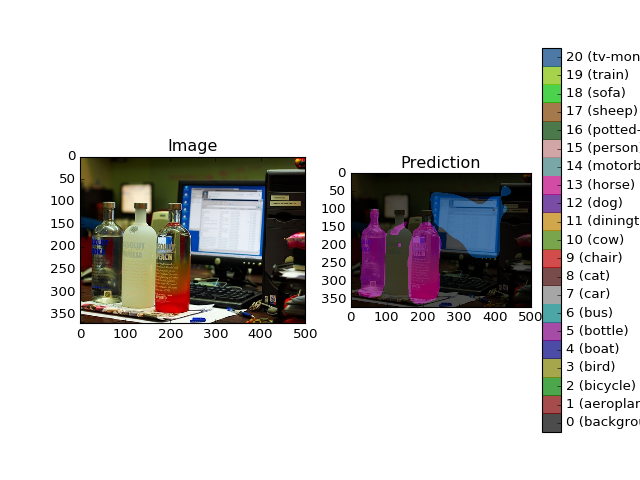

<IPython.core.display.Javascript object>


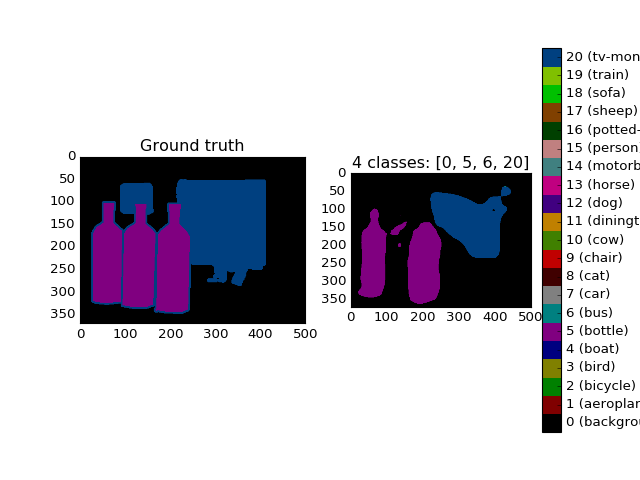

In [9]:
import infer_plots_PASCAL as infp
infp.printClassPredInfo(out)
infp.plot_inference_results(im, gt, out)